In [1]:
input_file = 'data/dustpedia_z0.dat'
!head -2 $input_file

# name	redshift	redshift_err	ra	dec	semimaj_arcsec	axial_ratio	pos_angle	global_flag	GALEX.FUV	GALEX.FUV_err	GALEX.FUV_flag	GALEX.NUV	GALEX.NUV_err	GALEX.NUV_flag	SDSS.u	SDSS.u_err	SDSS.u_flag	SDSS.g	SDSS.g_err	SDSS.g_flag	SDSS.r	SDSS.r_err	SDSS.r_flag	SDSS.i	SDSS.i_err	SDSS.i_flag	SDSS.z	SDSS.z_err	SDSS.z_flag	2MASS.J	2MASS.J_err	2MASS.J_flag	2MASS.H	2MASS.H_err	2MASS.H_flag	2MASS.Ks	2MASS.Ks_err	2MASS.Ks_flag	WISE.W1	WISE.W1_err	WISE.W1_flag	WISE.W2	WISE.W2_err	WISE.W2_flag	WISE.W3	WISE.W3_err	WISE.W3_flag	WISE.W4	WISE.W4_err	WISE.W4_flag	Spitzer.IRAC.I1	Spitzer.IRAC.I1_err	Spitzer.IRAC.I1_flag	Spitzer.IRAC.I2	Spitzer.IRAC.I2_err	Spitzer.IRAC.I2_flag	Spitzer.IRAC.I3	Spitzer.IRAC.I3_err	Spitzer.IRAC.I3_flag	Spitzer.IRAC.I4	Spitzer.IRAC.I4_err	Spitzer.IRAC.I4_flag	Spitzer.MIPS.24mu	Spitzer.MIPS.24mu_err	Spitzer.MIPS.24mu_flag	Spitzer.MIPS.70mu	Spitzer.MIPS.70mu_err	Spitzer.MIPS.70mu_flag	Spitzer.MIPS.160mu	Spitzer.MIPS.160mu_err	Spitzer.MIPS.160mu_flag	Herschel.PACS.blue	Herschel.PACS.

In [2]:
from galapy.internal.utils import cat_to_dict

In [3]:
help(cat_to_dict)

Help on function cat_to_dict in module galapy.internal.utils:

cat_to_dict(infile, id_field='id', err_field='_err', meta_fields=[], skip_fields=[])
    Converts an ASCII (e.g. Topcat-like) catalogue into a 2-levels dictionary.
    The 1st order dictionary contains a 2nd order dictionary for each entry in the catalogue.
    Each 2nd order dictionary contains data and meta-data about the named entry. 
    
    Parameters
    ----------
    infile : str
        Path to the ASCII file
    id_field : str
        (Optional, default='id') header name of the field containing the sources' ID
    err_field : str
        (Optional, default='_err') the sub-string identifying fields
        containing error measurements
    meta_fields : str or sequence of str
        (Optional, default empty list) which fields to consider meta-data
        Either a single string or a sequence of strings. 
        Also accepts wildcards (e.g. ``meta_fields = 'R*'`` will
        consider all the fields in header tha

In [4]:
catalogue = cat_to_dict(
    input_file, id_field='name', err_field='_err',
    meta_fields = ['redshift', 'redshift_err'],
    skip_fields = ['ra', 'dec', 'semimaj_arcsec', 'axial_ratio', 'pos_angle', '*_flag']
)

In [5]:
list(catalogue)

['NGC3898', 'NGC4351', 'NGC3364', 'NGC4254']

In [6]:
list(catalogue['NGC3898'])

['bands', 'fluxes', 'errors', 'redshift', 'redshift_err']

In [7]:
catalogue['NGC3364']['bands']

array(['GALEX.FUV', 'GALEX.NUV', '2MASS.J', '2MASS.H', '2MASS.Ks',
       'WISE.W1', 'WISE.W2', 'WISE.W3', 'WISE.W4', 'Spitzer.IRAC.I1',
       'Spitzer.IRAC.I2', 'Herschel.PACS.green', 'Herschel.PACS.red',
       'Herschel.SPIRE.PSW', 'Herschel.SPIRE.PMW', 'Herschel.SPIRE.PLW'],
      dtype='<U19')

In [11]:
from galapy.PhotometricSystem import PMS

for obj in catalogue.values() :
    obj['pms'] = PMS(*obj['bands'])

In [12]:
for key in catalogue :
    obj = catalogue[key]
    obj['uplims'] = obj['errors']<0.0
    obj['errors'][obj['uplims']] = obj['fluxes'][obj['uplims']]
    print(f"object {key} has {obj['uplims'].sum()} non-detections")

object NGC3898 has 0 non-detections
object NGC4351 has 0 non-detections
object NGC3364 has 0 non-detections
object NGC4254 has 0 non-detections


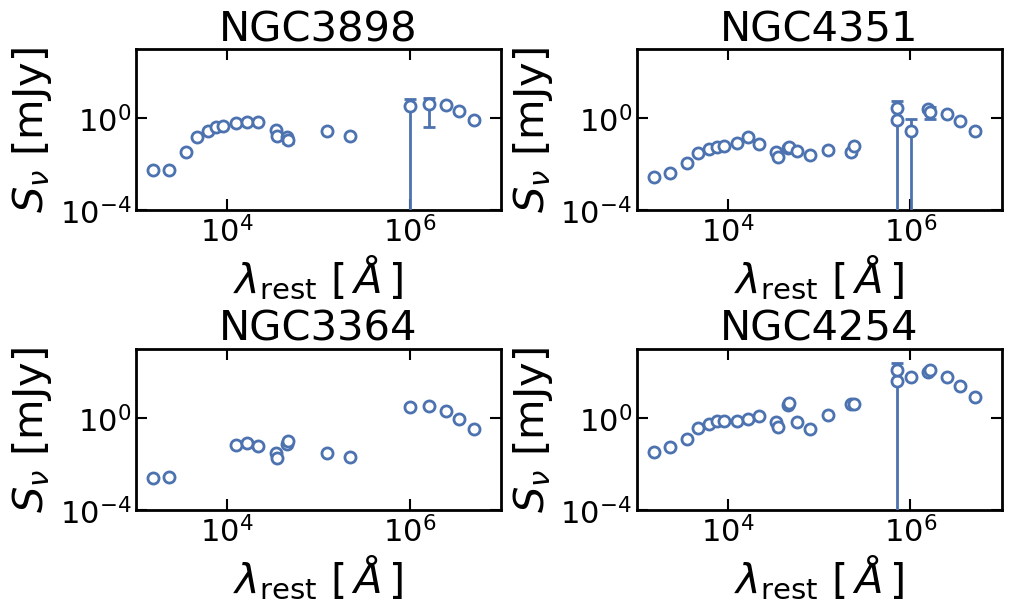

In [13]:
from galapy.analysis import plot as gplot

# build a matplotlib figure and axes array with the internal pyplot format
fig, axes = gplot.plt.subplots(2,2,figsize=(10,6), constrained_layout=True)

# Loop on the 4 objects and axes
for ax, key in zip(axes.flatten(), catalogue) :

    # set a title for the axes
    ax.set_title(key)

    # extract object from catalogue
    obj = catalogue[key]

    # set the image layout (with axis limits)
    ax = gplot.sed_layout(
        redshift=obj['redshift'], frame='rest', ax = ax,
        xlim=(1.e+3, 1.e+7), ylim=(1.e-4, 1.e+3)
    )

    # plot the fluxes
    _ = gplot.sed_obs(
        obj['pms'].lpiv, obj['fluxes'], obj['errors'],
        lo = obj['uplims'],
        redshift = obj['redshift'], frame = 'rest', ax = ax
    )

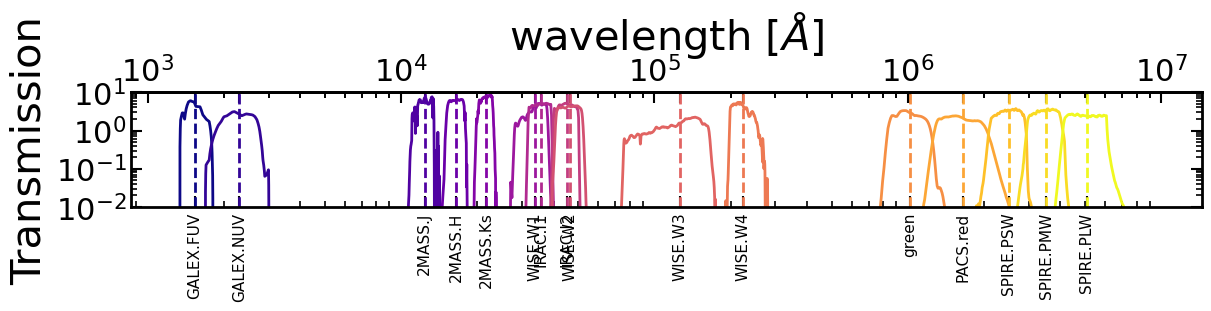

In [14]:
fig, ax = gplot.plt.subplots(1,1,figsize=(12,3), constrained_layout=True)
_ = gplot.photometric_system(catalogue['NGC3364']['pms'], ax=ax)